In [55]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv('Social_Network_Ads.csv')

In [57]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
df=df[['Gender','Age','EstimatedSalary','Purchased']]

In [59]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [60]:
# Gender
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0 )

In [61]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [62]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


train test split

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:, 0:3], df.iloc[:,-1],test_size=.1, random_state=42)

In [64]:
x_train.shape

(360, 3)

In [65]:
y_train

381    1
55     0
76     0
25     1
82     0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 360, dtype: int64

scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [67]:
x_train

array([[ 1.0168079 ,  0.99930425, -1.0929077 ],
       [-0.98346994, -1.32917168, -0.45206747],
       [ 1.0168079 , -1.91129066, -0.53945477],
       ...,
       [-0.98346994,  0.5142051 ,  1.82000244],
       [ 1.0168079 ,  0.12612578,  0.18877276],
       [-0.98346994, -0.55301303,  0.45093467]])

In [68]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# stochastic gradient decent

In [69]:
model=Sequential()

In [70]:
# 1 hidden layer
model.add(Dense(10,activation='relu',input_dim=3))
# hidden layer 2
model.add(Dense(10,activation='relu'))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                40        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model compilation

In [84]:
import time

In [86]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
# history
start=time.time()
print(start)
history=model.fit(x_train,y_train,batch_size=1,epochs=50,validation_split=.1)
print(time.time()-start)

1698751855.2321923
Epoch 1/50


324/324 [==============================] - 2s 3ms/step - loss: 0.1998 - accuracy: 0.9136 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 2/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9105 - val_loss: 0.2622 - val_accuracy: 0.8889
Epoch 3/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9105 - val_loss: 0.2582 - val_accuracy: 0.8889
Epoch 4/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9105 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 5/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1973 - accuracy: 0.9105 - val_loss: 0.2685 - val_accuracy: 0.9167
Epoch 6/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9074 - val_loss: 0.2606 - val_accuracy: 0.9167
Epoch 7/50
324/324 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9136 - val_loss: 0.2728 - val_accuracy: 0.9167
Epoch 8/50
324/32

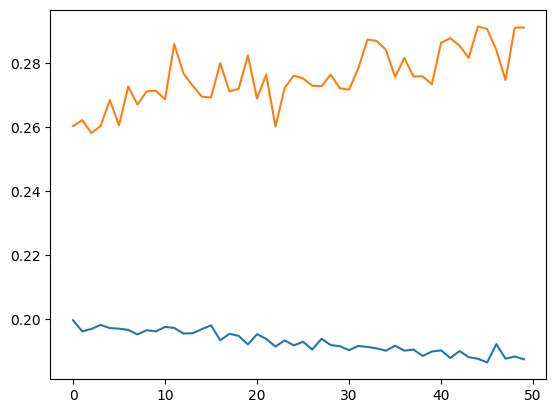

In [88]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

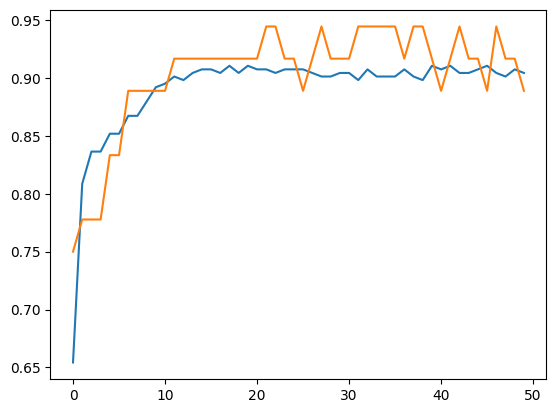

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# batch gradient decent